In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Data import
df_covid= pd.read_csv('C:/Users/HP/Desktop/owid-covid-data.csv')
print('\ndata imported successfully\n')


data imported successfully



In [5]:
df_covid.head(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
#checking the columns
print('\ncolumns in the dataset are:\n')
pd.set_option('display.max_columns', None)
print(df_covid.columns)


columns in the dataset are:

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vac

In [8]:
#filtering key columns for analysis
Covid_data =df_covid[['continent','location','date','total_cases','new_cases','total_deaths','new_deaths','total_vaccinations','people_fully_vaccinated','population','life_expectancy']]
Covid_data.head()

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_fully_vaccinated,population,life_expectancy
0,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,39835428.0,64.83
1,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0,64.83
2,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0,64.83
3,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0,64.83
4,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,39835428.0,64.83


In [11]:
Covid_data.dtypes

continent                   object
location                    object
date                        object
total_cases                float64
new_cases                  float64
total_deaths               float64
new_deaths                 float64
total_vaccinations         float64
people_fully_vaccinated    float64
population                 float64
life_expectancy            float64
dtype: object

In [13]:
Covid_data.shape

(166326, 11)

In [ ]:
#data cleaning
Covid_data.isna().count()
print('\nThe number of null values in each column is:\n')



The number of null values in each column is:



continent                  166326
location                   166326
date                       166326
total_cases                166326
new_cases                  166326
total_deaths               166326
new_deaths                 166326
total_vaccinations         166326
people_fully_vaccinated    166326
population                 166326
life_expectancy            166326
dtype: int64

In [ ]:
#dropping null values
covid_data_cln=Covid_data.dropna()
covid_data_cln.shape

(33968, 11)

In [20]:
covid_data_cln

,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_fully_vaccinated,population,life_expectancy
442,Asia,Afghanistan,2021-05-11,62403.0,340.0,2710.0,12.0,504502.0,55624.0,39835428.0,64.83
451,Asia,Afghanistan,2021-05-20,64575.0,453.0,2772.0,10.0,547901.0,77560.0,39835428.0,64.83
455,Asia,Afghanistan,2021-05-24,66275.0,547.0,2812.0,10.0,573277.0,96910.0,39835428.0,64.83
457,Asia,Afghanistan,2021-05-26,67743.0,840.0,2855.0,19.0,590454.0,111082.0,39835428.0,64.83
458,Asia,Afghanistan,2021-05-27,68366.0,623.0,2869.0,14.0,593313.0,113739.0,39835428.0,64.83
...,...,...,...,...,...,...,...,...,...,...,...
166320,Africa,Zimbabwe,2022-02-28,236380.0,577.0,5395.0,2.0,7890951.0,3396655.0,15092171.0,61.49
166321,Africa,Zimbabwe,2022-03-01,236871.0,491.0,5395.0,0.0,7901360.0,3399915.0,15092171.0,61.49
166322,Africa,Zimbabwe,2022-03-02,237503.0,632.0,5396.0,1.0,7910740.0,3402434.0,15092171.0,61.49
166323,Africa,Zimbabwe,2022-03-03,237503.0,0.0,5396.0,0.0,7921113.0,3406482.0,15092171.0,61.49


In [24]:
#column rename
covid_data_cln.rename(columns={'location':'country'},inplace=True)
print('\nThe columns have been renamed successfully\n')
covid_data_cln.head()


The columns have been renamed successfully



C:\Users\HP\AppData\Local\Temp\ipykernel_10088\3390816411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid_data_cln.rename(columns={'location':'country'},inplace=True)


,continent,country,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_fully_vaccinated,population,life_expectancy
442,Asia,Afghanistan,2021-05-11,62403.0,340.0,2710.0,12.0,504502.0,55624.0,39835428.0,64.83
451,Asia,Afghanistan,2021-05-20,64575.0,453.0,2772.0,10.0,547901.0,77560.0,39835428.0,64.83
455,Asia,Afghanistan,2021-05-24,66275.0,547.0,2812.0,10.0,573277.0,96910.0,39835428.0,64.83
457,Asia,Afghanistan,2021-05-26,67743.0,840.0,2855.0,19.0,590454.0,111082.0,39835428.0,64.83
458,Asia,Afghanistan,2021-05-27,68366.0,623.0,2869.0,14.0,593313.0,113739.0,39835428.0,64.83


In [34]:
covid_data_cln['country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Faeroe Islands',
       'Fiji', 'Finland', 'France', 'Fr

In [35]:
#filtering countries of interest
covid_filtered=covid_data_cln[covid_data_cln['country'].isin(['China','India','United Kingdom','United States','Italy','Kenya','South Africa','Brazil','Nigeria','Mexico'])]
covid_filtered.shape

(2911, 11)

PLOT ANALYSIS

In [38]:
sns.set(style='darkgrid')


Text(0, 0.5, 'Total Cases Recorded')

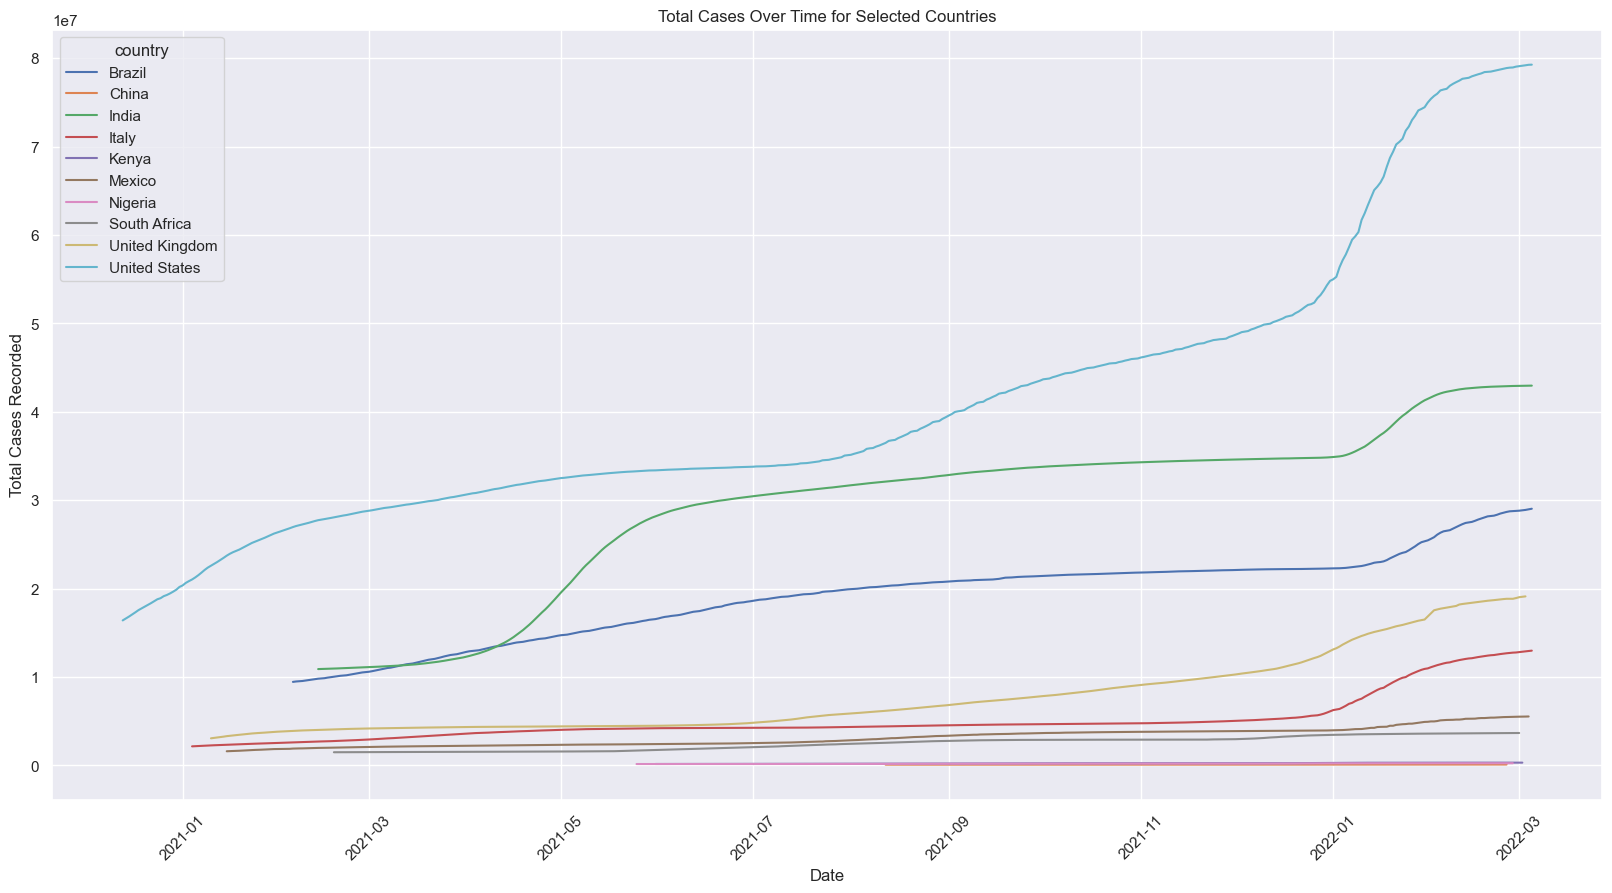

In [39]:
#total cases over time for selected countries.
plt.figure(figsize=(20,10))
sns.lineplot(data=covid_filtered,x='date',y='total_cases',hue='country')
plt.title('Total Cases Over Time for Selected Countries')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Cases Recorded')

Text(0, 0.5, 'Total Deaths Recorded')

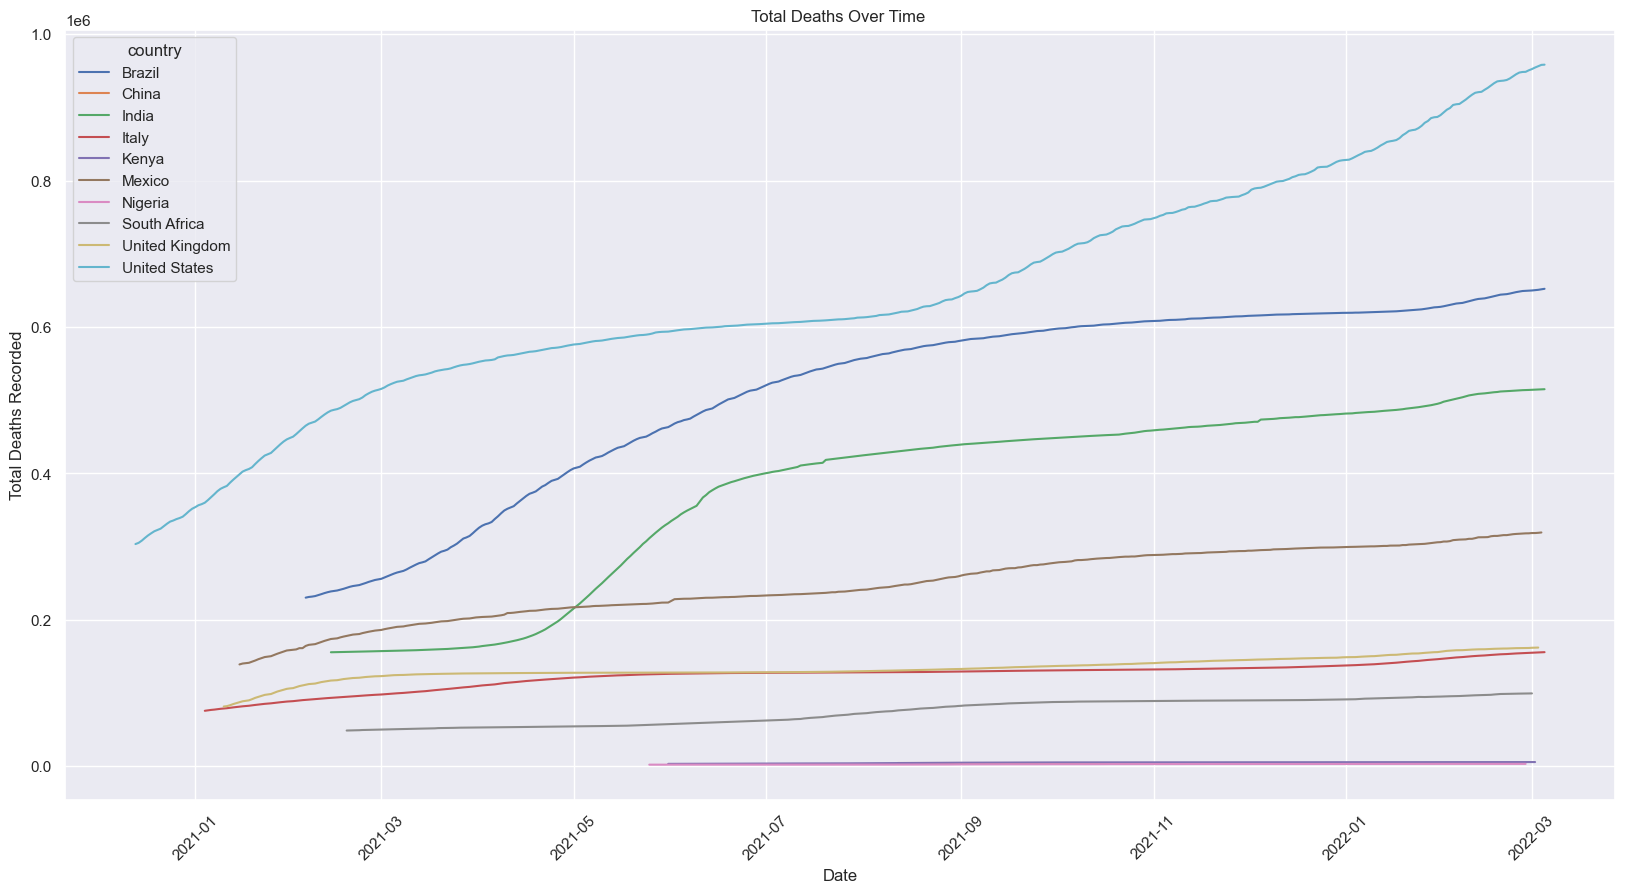

In [40]:
#total deaths over time.
plt.figure(figsize=(20,10))
sns.lineplot(data=covid_filtered,x='date',y='total_deaths',hue='country')
plt.title('Total Deaths Over Time ')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Deaths Recorded')

Text(0, 0.5, 'Daily New Cases Recorded')

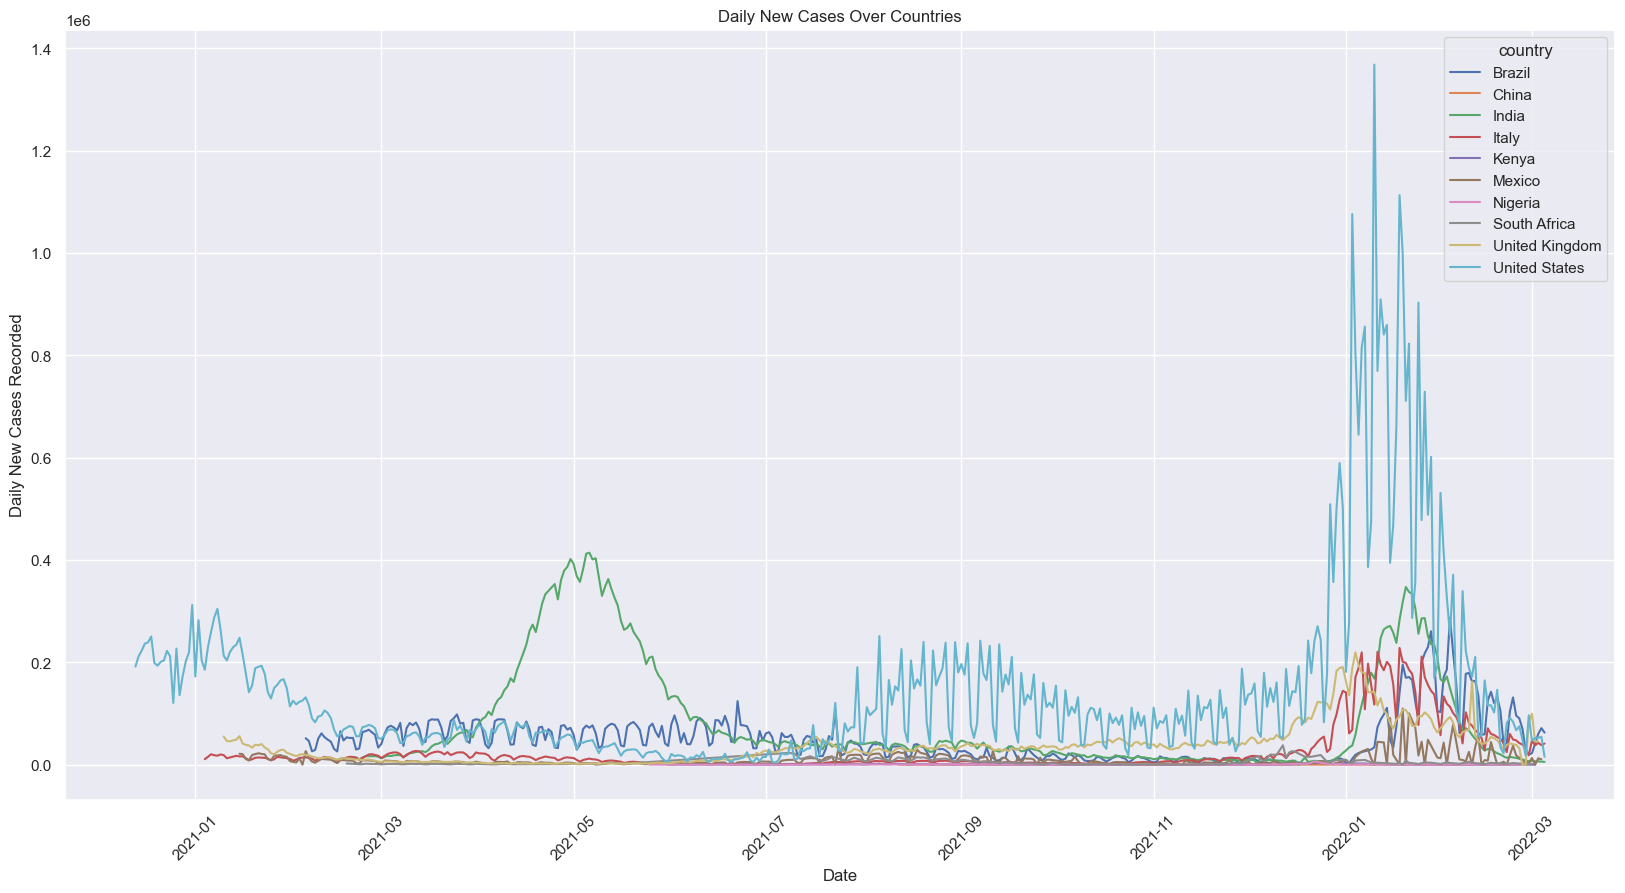

In [43]:
#Comparison daily new cases between countries.
plt.figure(figsize=(20,10))
sns.lineplot(data=covid_filtered,x='date',y='new_cases',hue='country')
plt.title('Daily New Cases Over Countries')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Daily New Cases Recorded')

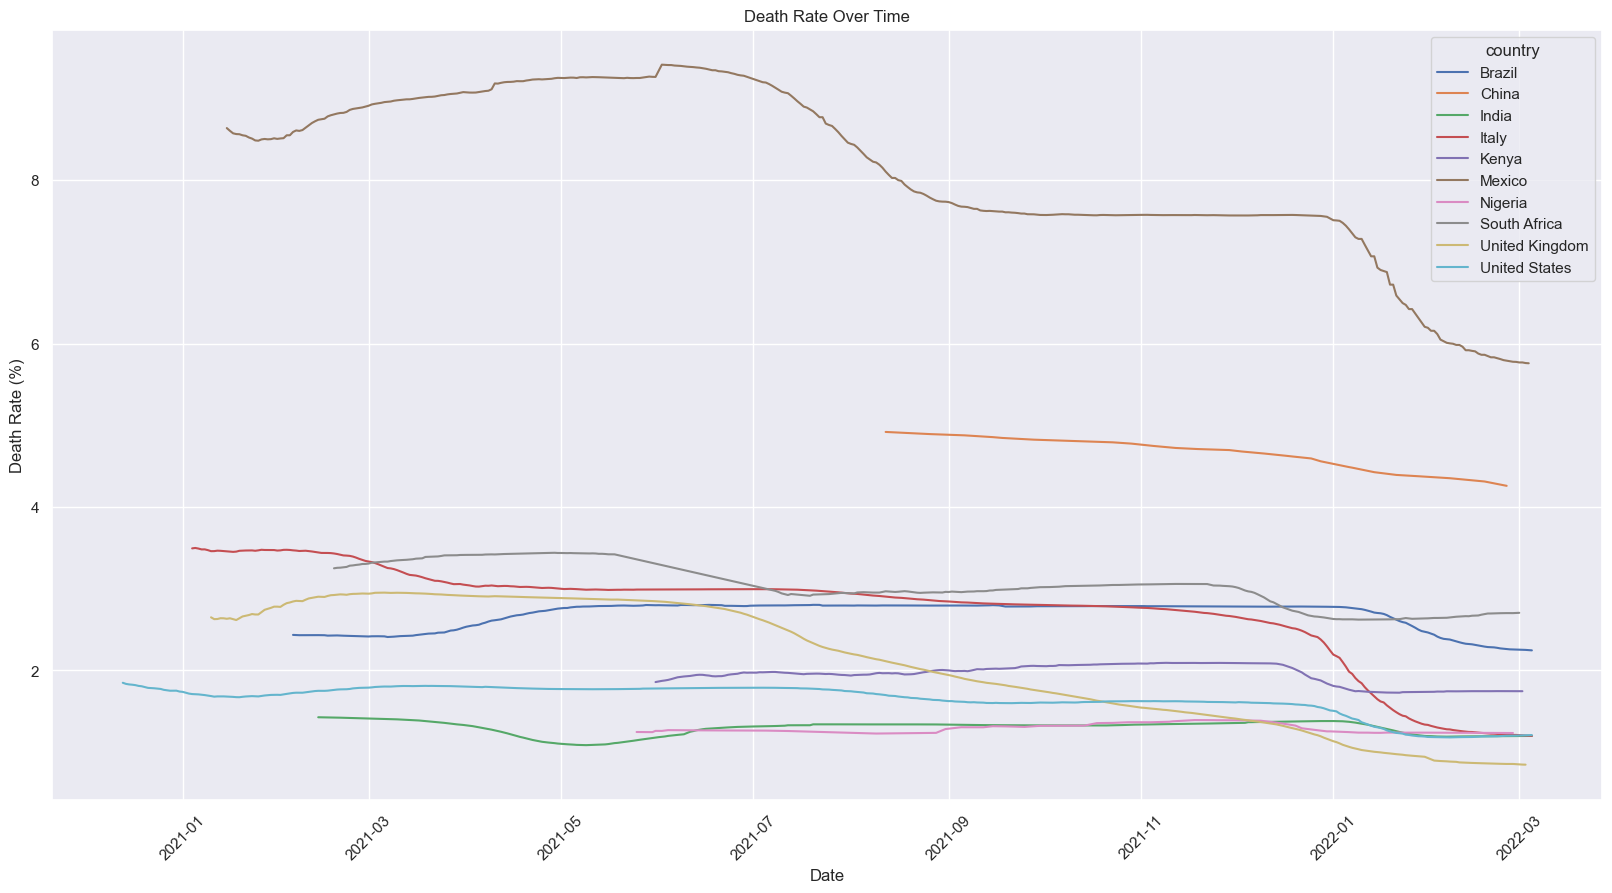

In [53]:
#death rate
Death_rate=covid_filtered.loc[:, 'death_rate'] = (covid_filtered['total_deaths'] / covid_filtered['total_cases']) * 100

plt.figure(figsize=(20,10))
sns.lineplot(data=covid_filtered,x='date',y='death_rate',hue='country')
plt.title('Correlation Heatmap')
plt.title('Death Rate Over Time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Death Rate (%)')
plt.show()

Text(0, 0.5, 'Total Vaccinations Recorded')

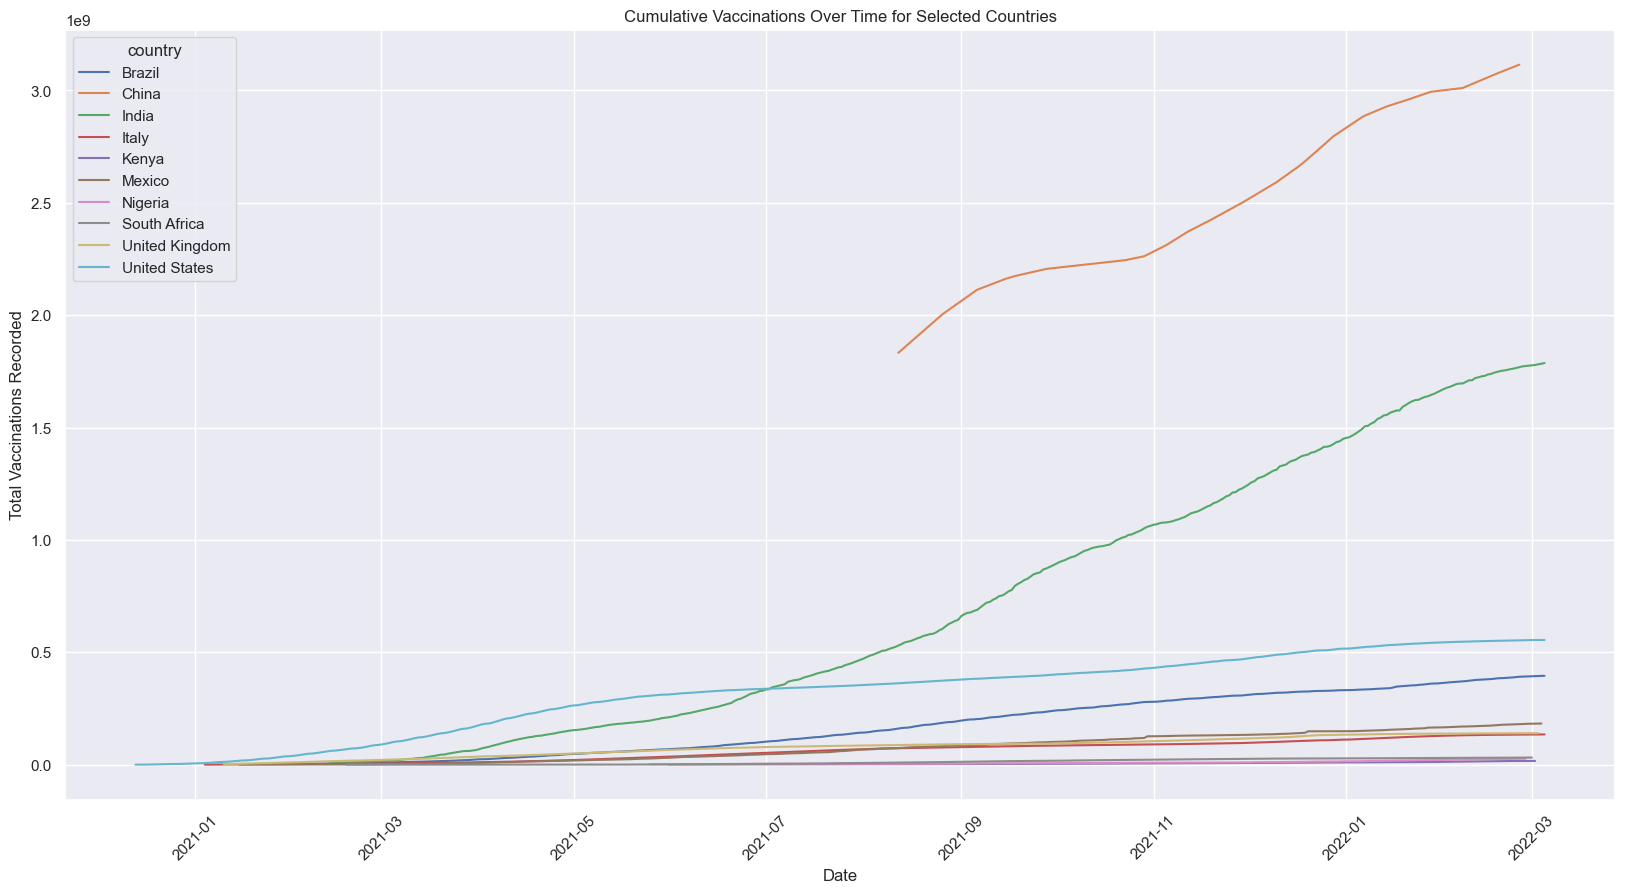

In [54]:
# cumulative vaccinations over time for selected countries.
plt.figure(figsize=(20,10))
sns.lineplot(data=covid_filtered,x='date',y='total_vaccinations',hue='country')
plt.title('Cumulative Vaccinations Over Time for Selected Countries')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Total Vaccinations Recorded')

In [57]:
covid_filtered.columns

Index(['continent', 'country', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_vaccinations',
       'people_fully_vaccinated', 'population', 'life_expectancy',
       'death_rate'],
      dtype='object')

Text(0, 0.5, 'Vaccination Rate (%)')

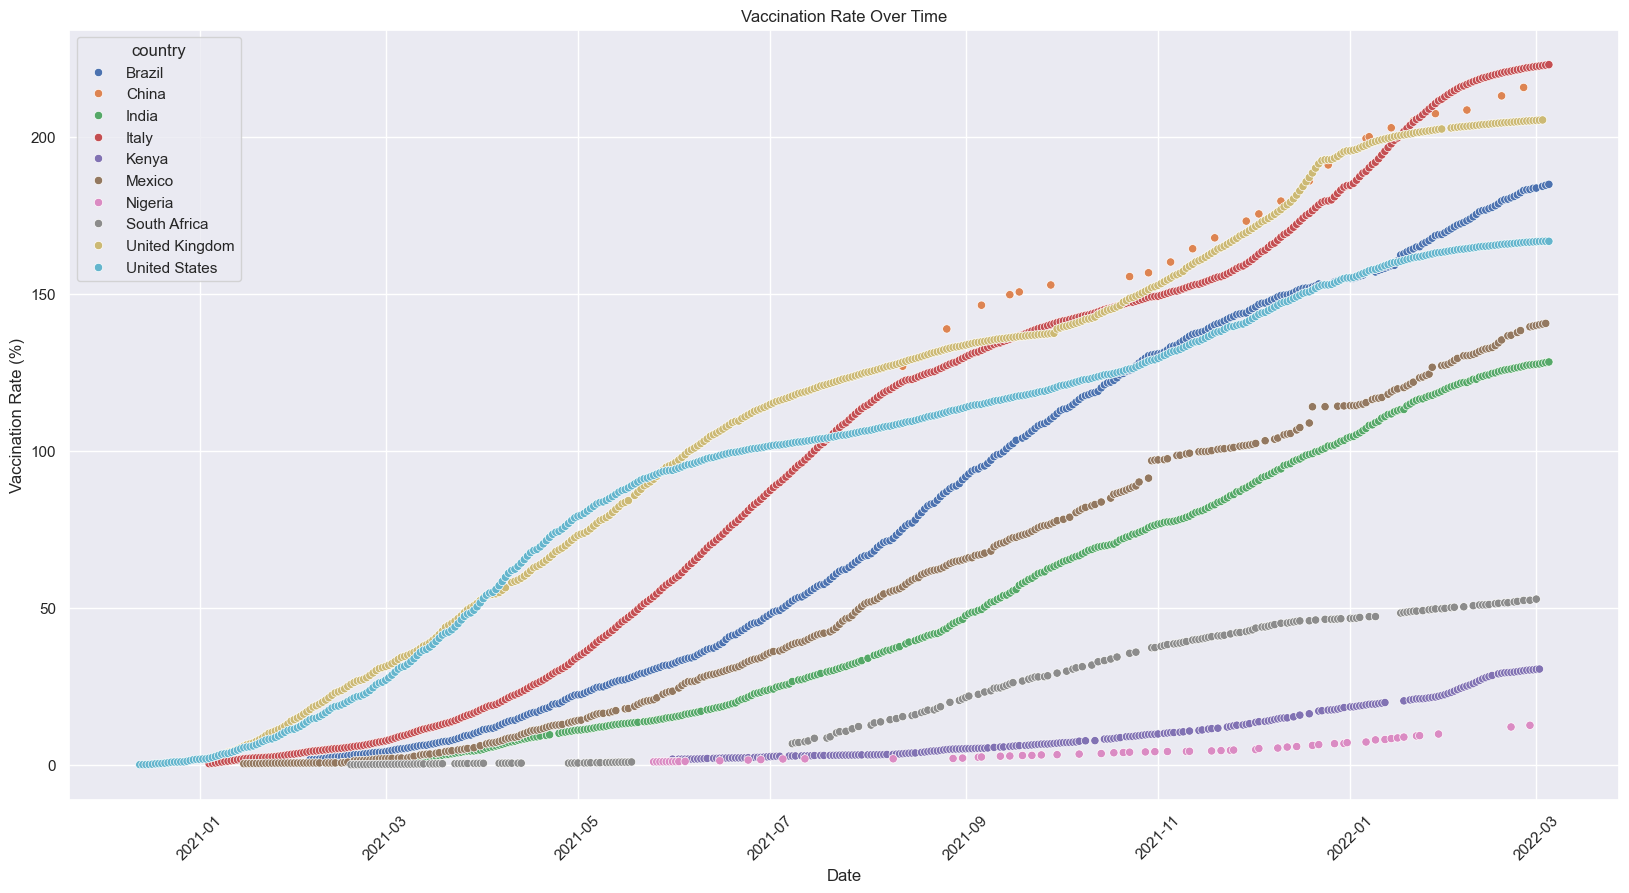

In [59]:
#vaccination population comparison
vaccination_rate=covid_filtered.loc[:, 'vaccination_rate'] = (covid_filtered['total_vaccinations'] / covid_filtered['population']) * 100
plt.figure(figsize=(20,10))
sns.scatterplot(data=covid_filtered,x='date',y='vaccination_rate',hue='country')
plt.title('Vaccination Rate Over Time')
plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('Vaccination Rate (%)')

Text(0, 0.5, 'Total Cases Recorded')

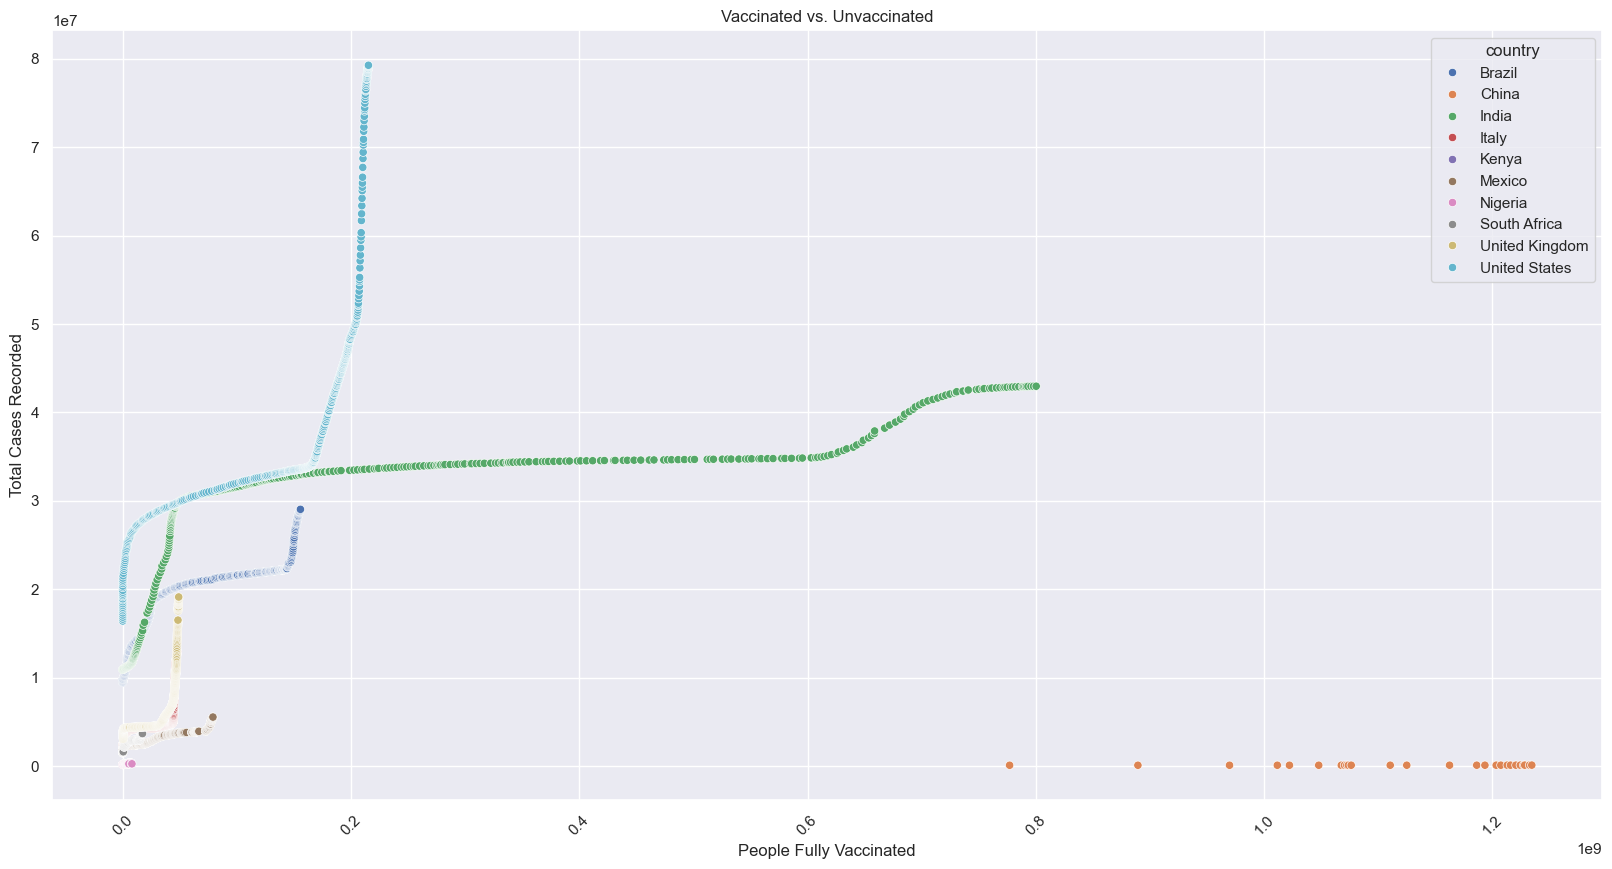

In [61]:
#vaccinated vs. unvaccinated.
plt.figure(figsize=(20,10))
sns.scatterplot(data=covid_filtered,x='people_fully_vaccinated',y='total_cases',hue='country')
plt.title('Vaccinated vs. Unvaccinated')
plt.xticks(rotation=45)
plt.xlabel('People Fully Vaccinated')

plt.ylabel('Total Cases Recorded')

In [62]:
#creating a choropleth map
import plotly.express as px
import plotly.graph_objects as go

In [72]:

#Filtering key columns for the choropleth map
Covid_data = df_covid[['iso_code', 'location', 'date', 'total_cases', 'people_fully_vaccinated', 'population']]

Covid_data['date'] = pd.to_datetime(Covid_data['date'])
Covid_data.rename(columns={'location':'Country'},inplace=True)
Covid_data_clean = Covid_data.dropna()

# Get the latest data per country
latest_df = Covid_data_clean.sort_values('date').groupby('iso_code').last().reset_index()

# 3. Calculate vaccination rate (% of population fully vaccinated)
latest_df['vaccination_rate'] = (latest_df['people_fully_vaccinated'] / latest_df['population']) * 100

# 4. Create the choropleth map
fig = px.choropleth(
    latest_df,
    locations='iso_code',
    color='total_cases',
    hover_name='Country',
    color_continuous_scale='blues',
    title='Total COVID-19 Cases by Country with Vaccination Rate',
    hover_data={
        'total_cases': True,
        'vaccination_rate': ':.2f',  # Show as percent with 2 decimal places
        'iso_code': False  # Hide ISO code in tooltip
    }
)

fig.update_layout(
    geo=dict(showframe=False, showcoastlines=False, projection_type='equirectangular'),
    coloraxis_colorbar=dict(title='total Cases'),
)

fig.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10088\3218821448.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\HP\AppData\Local\Temp\ipykernel_10088\3218821448.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



INSIGHTS FROM THE SELECTED TEN COUNTRIES

1. The number of deaths and cases increased exponentially over time from 2021 to 2022 .The highest deaths and cases were in 2022.
2. United States had the highest number of deaths and covid cases recorded between 2021 and 2022.
3. Daily recorded new cases were at peak in 2021 May and in 2022 from January to 2022 march .More cases were recorded in 2022.
4. Covid-19 Vaccinations administration rate increased over time from 2021 march all the way to 2022 march.
5. More vaccines were administered in 2022 for the many countries